**PROJECT TITLE**

Online Retail Sales Analysis & Interactive Business Dashboard

**1. Introduction**

The objective of the Project is to understand how businesses make decisions based on sales data collected from the Online Retail Store, analyze the way customers interact with products, evaluate the current state of revenue for the company, and find the highest-value market opportunities.

The processes that fall under this analysis include:

*   The Cleanliness and Preprocessing of Sales Data

*   Exploratory Data Analysis (EDA) on the Sales Data

*   Finding Trends in Sales Over Time

*   Determining what products customers buy collectively

*   Finding the Trend of Revenue by Geographical Area

*   Interactive Sales Reports in PowerBI for Decision-Making

Through the Project, businesses will be able to use Data Analytics to Expand their Business, Evaluate their Performance and Focus on their Customer's Needs.

**2. Business Problem**

The company needs to learn about the following:

*    The top countries for revenue generation.

*    Sales patterns for each month, year of business.

*    The largest selling products and categories.

*    The hours/days of peak customer activity.

*    The way that these insights can drive business decisions.

Our goal is to discover historical data in such a way that we derive meaningful business insights, visual analytics to back these insights up.

**3. Dataset Description**

 [Data Set: Online Retail II](https://www.kaggle.com/datasets/tunguz/online-retail-ii)

Time Frame: 2010 - 2011

Transaction Entries: Approximately 500,000

Attributes:

* InvoiceNo (Transaction Identifier)

* StockCode (Product Identifier)

* Description (Product Name)

* Quantity

* Invoice Date

* Unit Price

* Customer ID

* Country of Origin

Additional Attributes Created:

* Total Transaction Price

* Year, Month, Day of Week, Hour of Day

* Monthly Revenue Summary



In [1]:
import kagglehub
path = kagglehub.dataset_download("tunguz/online-retail-ii")

100%|██████████| 7.13M/7.13M [00:00<00:00, 82.8MB/s]

Extracting files...


In [2]:
import pandas as pd
import os
files_in_path = os.listdir(path)

csv_file = None
for f in files_in_path:
    if f.endswith('.csv'):
        csv_file = f
        break

if csv_file:
    full_csv_path = os.path.join(path, csv_file)
    df = pd.read_csv(full_csv_path, encoding='latin-1')
    print(df.head())
else:
    print(f"No CSV file found in the directory: {path}")
    df = pd.DataFrame()

  Invoice StockCode                          Description  Quantity  \
0  536365    85123A   WHITE HANGING HEART T-LIGHT HOLDER         6   
1  536365     71053                  WHITE METAL LANTERN         6   
2  536365    84406B       CREAM CUPID HEARTS COAT HANGER         8   
3  536365    84029G  KNITTED UNION FLAG HOT WATER BOTTLE         6   
4  536365    84029E       RED WOOLLY HOTTIE WHITE HEART.         6   

    InvoiceDate  Price  Customer ID         Country  
0  12/1/10 8:26   2.55      17850.0  United Kingdom  
1  12/1/10 8:26   3.39      17850.0  United Kingdom  
2  12/1/10 8:26   2.75      17850.0  United Kingdom  
3  12/1/10 8:26   3.39      17850.0  United Kingdom  
4  12/1/10 8:26   3.39      17850.0  United Kingdom  


In [3]:
df.columns

Index(['Invoice', 'StockCode', 'Description', 'Quantity', 'InvoiceDate',
       'Price', 'Customer ID', 'Country'],
      dtype='object')

In [4]:
df.info()

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 541910 entries, 0 to 541909
Data columns (total 8 columns):
 #   Column       Non-Null Count   Dtype  
---  ------       --------------   -----  
 0   Invoice      541910 non-null  object 
 1   StockCode    541910 non-null  object 
 2   Description  540456 non-null  object 
 3   Quantity     541910 non-null  int64  
 4   InvoiceDate  541910 non-null  object 
 5   Price        541910 non-null  float64
 6   Customer ID  406830 non-null  float64
 7   Country      541910 non-null  object 
dtypes: float64(2), int64(1), object(5)
memory usage: 33.1+ MB


In [5]:
df.isnull().sum()

,0
Invoice,0
StockCode,0
Description,1454
Quantity,0
InvoiceDate,0
Price,0
Customer ID,135080
Country,0


**4. Data Cleaning Steps**

The below steps were taken to prepare the data so it can be cleared & usable:

1. Removed all entries without a customer ID


In [6]:
df = df.dropna(subset=['Customer ID'])

2.  Removed all Negative Quantities

In [7]:
df = df[df['Quantity'] > 0]

In [8]:
df=df[df['Price']>0]

3. Removed Duplicate Values

In [9]:
df.drop_duplicates(inplace=True)

4. Clculated the Total Revenue Made by:

```
total revenue = (quantity sold) x (each unit price)
```

In [10]:
df['total_price']=df['Price']*df['Quantity']

The Cleaned Data Supports Consistent/Accurate Analysis

**Feature Engineering**

Added Additional Analytical Features To The Data:
1.  Converted all invoicing dates/times to a date/time object

2.  Created A New Field With Extracted Time-Related Features

*  Year

* Month

* Day of Week

* Hour

In [11]:
df['InvoiceDate']=pd.to_datetime(df['InvoiceDate'])
df['year']=df['InvoiceDate'].dt.year
df['month']=df['InvoiceDate'].dt.month
df['day']=df['InvoiceDate'].dt.day
df['hour']=df['InvoiceDate'].dt.hour
df['day_of_week']=df['InvoiceDate'].dt.day_name()

/tmp/ipython-input-4264321322.py:1: UserWarning: Could not infer format, so each element will be parsed individually, falling back to `dateutil`. To ensure parsing is consistent and as-expected, please specify a format.
  df['InvoiceDate']=pd.to_datetime(df['InvoiceDate'])


In [12]:
customer_df = df.groupby('Customer ID').agg({
    'total_price':'sum',
    'Quantity':'sum',
    'Invoice':'nunique'
}).reset_index()

In [13]:
customer_df.rename(columns={
    'TotalPrice':'TotalRevenue',
    'Quantity':'TotalUnitsPurchased',
    'Invoice':'NumPurchases'
}, inplace=True)

customer_df.head()

,Customer ID,total_price,TotalUnitsPurchased,NumPurchases
0,12346.0,77183.60,74215,1
1,12347.0,4310.00,2458,7
2,12348.0,1797.24,2341,4
3,12349.0,1757.55,631,1
4,12350.0,334.40,197,1


**6. Exploratory Data Analysis (EDA)**

***A. Monthly Sales Trend - 2011 Represents a Strong Increase in Sales***


The Month of October & November Represent The Highest Amount of Sales, Due to the Holiday Period.

Lowest Amount of Sales Occur in the Summer Months.

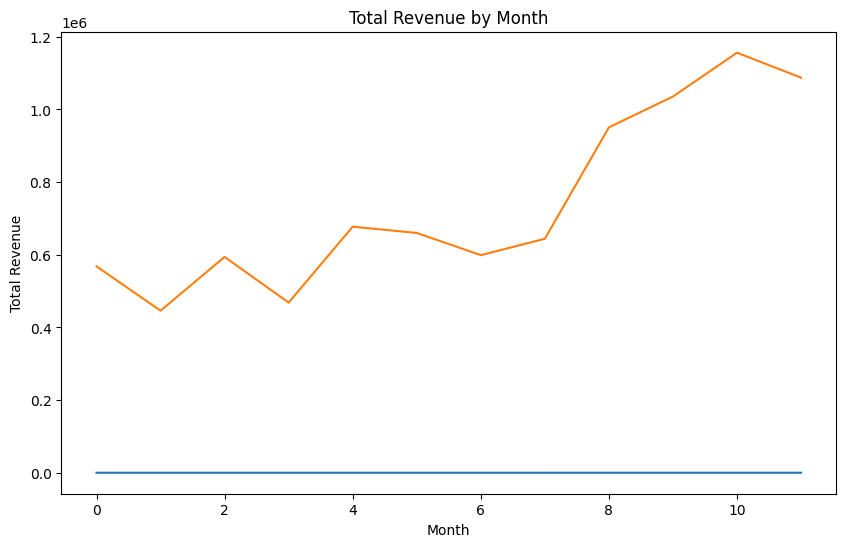

In [14]:
import matplotlib.pyplot as plt
import seaborn as sns

plt.figure(figsize=(10,6))
plt.plot(df.groupby('month')['total_price'].sum().reset_index())
plt.xlabel('Month')
plt.ylabel('Total Revenue')
plt.title('Total Revenue by Month')
plt.show()

***B. Revenue Breakdown By Country***

<Axes: xlabel='Country'>

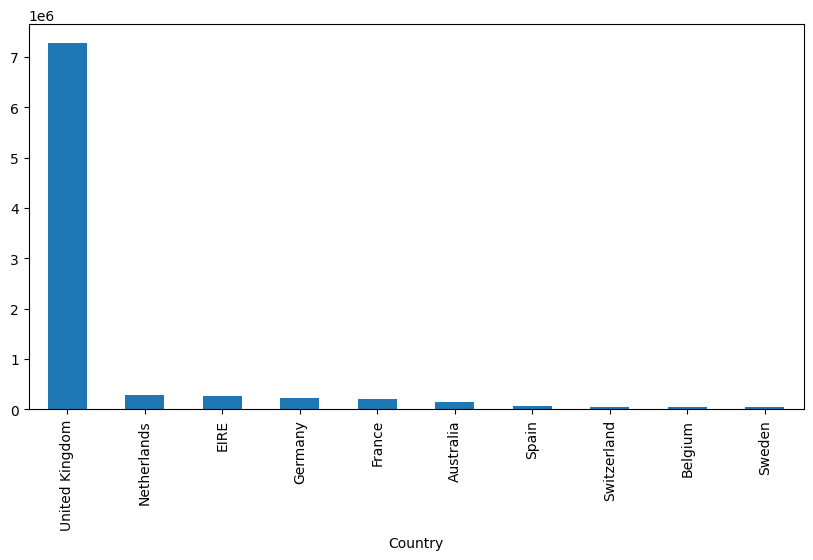

In [15]:
country_sales = df.groupby('Country')['total_price'].sum().sort_values(ascending=False)
country_sales.head(10).plot(kind='bar', figsize=(10,5))

In [16]:
country_sales.head(10)

,total_price
Country,
United Kingdom,7285024.644
Netherlands,285446.340
EIRE,265262.460
Germany,228678.400
France,208952.310
Australia,138453.810
Spain,61558.560
Switzerland,56443.950
Belgium,41196.340


The UK is the largest contributor to the overall sales, accounting for over 85% of total sales. Other important countries include:

The Netherlands

Germany

France

Ireland

These insights help to inform our marketing strategies and target specific countries.

***C) IDENTIFICATION OF BEST SELLERS***

<Axes: xlabel='Description'>

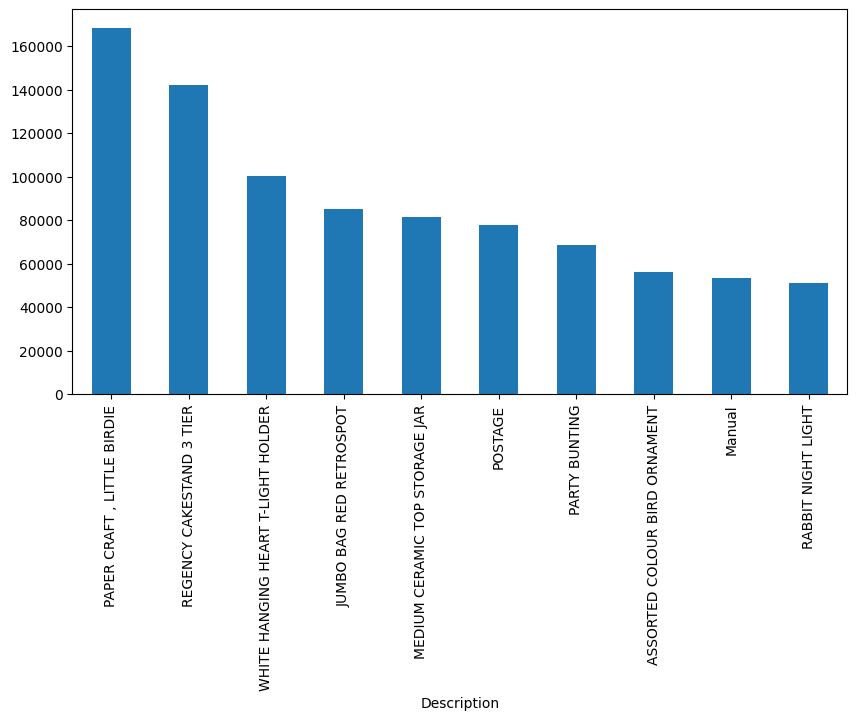

In [17]:
top_selling=df.groupby('Description')['total_price'].sum().sort_values(ascending=False)
top_selling.head(10).plot(kind='bar', figsize=(10,5))

The best-selling products are:

• Paper products.

• Gift baskets.

• Decorative items.

• Party Supplies.

All of the above are considered high volume products which will help to streamline the inventory and procurement process.

***D) Customer_id SALES***

<Axes: xlabel='Customer ID'>

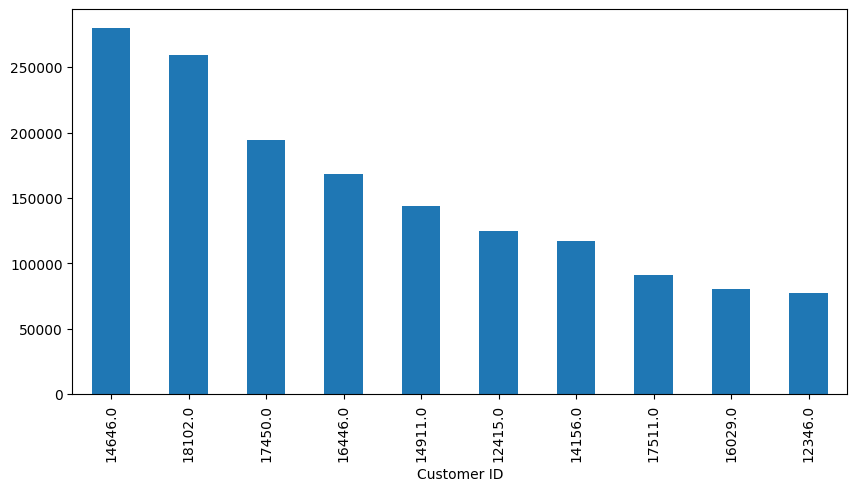

In [18]:
top_customers=df.groupby('Customer ID')['total_price'].sum().sort_values(ascending=False)
top_customers.head(10).plot(kind='bar', figsize=(10,5))

• The customer with the highest sales volume is 14646(customer_id).

• The second highest day is 18102(customer_id).

• The highest revenue generated is 250000+.

Thus, this gives the business an insight into staffing levels, promotion schedules and inventory needs.

***E) HOUR-OF-DAY SALES ANALYSIS***


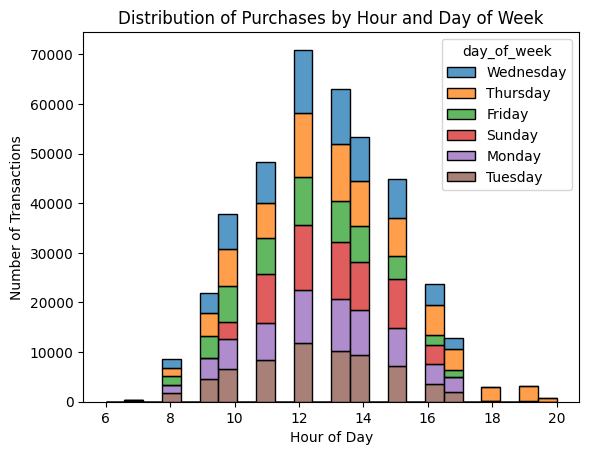

In [19]:
import matplotlib.pyplot as plt
import seaborn as sns
sns.histplot(data=df, x='hour', hue='day_of_week', multiple='stack', bins=24)
plt.title('Distribution of Purchases by Hour and Day of Week')
plt.xlabel('Hour of Day')
plt.ylabel('Number of Transactions')
plt.show()


• The maximum activity from customers occurs from 11:00 AM to 1:00 PM.

• This is considered the "best" window of opportunity to conduct targeted promotions and to suggest products to those customers.

***F) MONTHLY SALES VOLUME: QUANTITY SOLD/REVENUE***

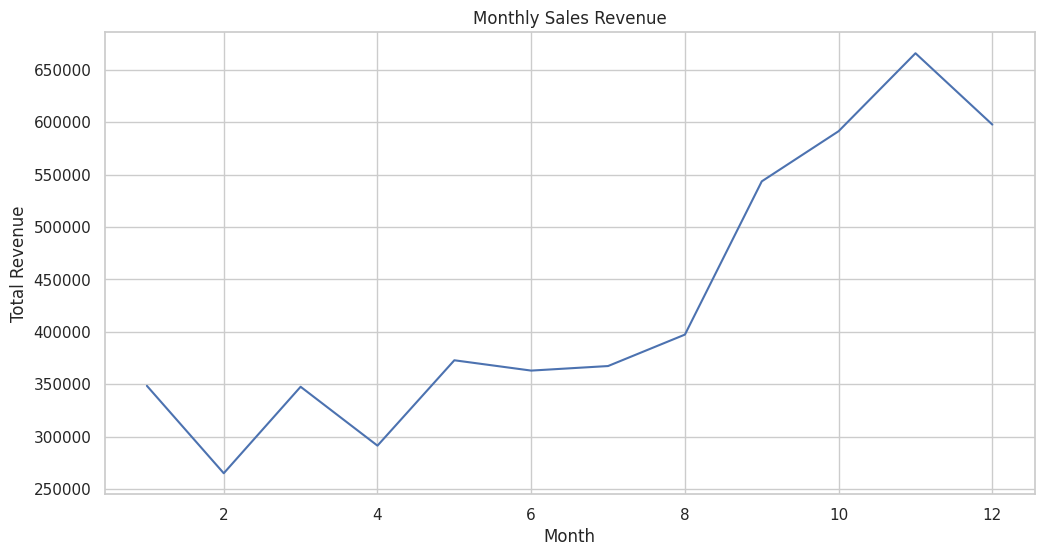

In [32]:
import matplotlib.pyplot as plt
import seaborn as sns
sns.set(style='whitegrid')
plt.figure(figsize=(12,6))
sns.lineplot(data=df.groupby('month')['Quantity'].sum().reset_index(), x='month', y='Quantity')
plt.title('Monthly Sales Revenue')
plt.xlabel('Month')
plt.ylabel('Total Revenue')
plt.show()

The trend of quantity sold and revenue generated for the month are very similar. The largest volume of units sold occurs in Q4 (holiday season) and the least number of units sold occurs during the summer months.

**7. Mechine Learning**

In [21]:
snapshot_date = df['InvoiceDate'].max() + pd.Timedelta(days=1)
print(f"Snapshot Date for RFM analysis: {snapshot_date}")

Snapshot Date for RFM analysis: 2011-12-10 12:50:00


In [22]:
rfm = df.groupby('Customer ID').agg(
    Recency=('InvoiceDate', lambda date: (snapshot_date - date.max()).days),
    Frequency=('Invoice', 'nunique'),
    Monetary=('total_price', 'sum')
).reset_index()

rfm['R_score'] = pd.qcut(rfm['Recency'], 5, labels=[5,4,3,2,1], duplicates='drop')
rfm['F_score'] = pd.qcut(rfm['Frequency'].rank(method='first'), 5, labels=[1,2,3,4,5], duplicates='drop')
rfm['M_score'] = pd.qcut(rfm['Monetary'].rank(method='first'), 5, labels=[1,2,3,4,5], duplicates='drop')
rfm['RFM_Score'] = rfm['R_score'].astype(str) + rfm['F_score'].astype(str) + rfm['M_score'].astype(str)

In [23]:
def segment_customer(score):
    if score >= '444':
        return 'VIP'
    elif score >= '333':
        return 'Loyal'
    elif score >= '222':
        return 'Regular'
    else:
        return 'At Risk'

rfm['Segment'] = rfm['RFM_Score'].apply(segment_customer)
rfm.head()
rfm['Segment'].value_counts()


,count
Segment,
VIP,1278
At Risk,1129
Regular,998
Loyal,933


In [24]:
rfm.sort_values(by='Monetary', ascending=False).head(10)

,Customer ID,Recency,Frequency,Monetary,R_score,F_score,M_score,RFM_Score,Segment
1689,14646.0,2,73,280206.02,5,5,5,555,VIP
4201,18102.0,1,60,259657.30,5,5,5,555,VIP
3728,17450.0,8,46,194390.79,5,5,5,555,VIP
3008,16446.0,1,2,168472.50,5,3,5,535,VIP
1879,14911.0,1,201,143711.17,5,5,5,555,VIP
55,12415.0,24,21,124914.53,4,5,5,455,VIP
1333,14156.0,10,55,117210.08,5,5,5,555,VIP
3771,17511.0,3,31,91062.38,5,5,5,555,VIP
2702,16029.0,39,63,80850.84,3,5,5,355,Loyal
0,12346.0,326,1,77183.60,1,1,5,115,At Risk


In [25]:
import pandas as pd
df['date'] = pd.to_datetime(df['InvoiceDate'])
monthly_sales = df.groupby(pd.Grouper(key='date', freq='M'))['total_price'].sum().reset_index()
print(monthly_sales)

         date  total_price
0  2010-12-31   570422.730
1  2011-01-31   568101.310
2  2011-02-28   446084.920
3  2011-03-31   594081.760
4  2011-04-30   468374.331
5  2011-05-31   677355.150
6  2011-06-30   660046.050
7  2011-07-31   598962.901
8  2011-08-31   644051.040
9  2011-09-30   950690.202
10 2011-10-31  1035642.450
11 2011-11-30  1156205.610
12 2011-12-31   517208.440


/tmp/ipython-input-3170976764.py:3: FutureWarning: 'M' is deprecated and will be removed in a future version, please use 'ME' instead.
  monthly_sales = df.groupby(pd.Grouper(key='date', freq='M'))['total_price'].sum().reset_index()


In [26]:
from sklearn.linear_model import LinearRegression
import numpy as np
train = monthly_sales.iloc[:-3]
test = monthly_sales.iloc[-3:]
train['month_num'] = np.arange(len(train))
test['month_num'] = np.arange(len(train), len(train) + len(test))
model = LinearRegression()
model.fit(train[['month_num']], train['total_price'])
predictions = model.predict(test[['month_num']])
print(predictions)

[788661.00446667 819723.5435697  850786.08267273]


/tmp/ipython-input-2716914593.py:5: SettingWithCopyWarning: 
A value is trying to be set on a copy of a slice from a DataFrame.
Try using .loc[row_indexer,col_indexer] = value instead

See the caveats in the documentation: https://pandas.pydata.org/pandas-docs/stable/user_guide/indexing.html#returning-a-view-versus-a-copy
  train['month_num'] = np.arange(len(train))
/tmp/ipython-input-2716914593.py:6: SettingWithCopyWarning: 
A value is trying to be set on a copy of a slice from a DataFrame.
Try using .loc[row_indexer,col_indexer] = value instead

See the caveats in the documentation: https://pandas.pydata.org/pandas-docs/stable/user_guide/indexing.html#returning-a-view-versus-a-copy
  test['month_num'] = np.arange(len(train), len(train) + len(test))


In [27]:
result = test.copy()
result['predicted'] = predictions
print(result)

         date  total_price  month_num      predicted
10 2011-10-31   1035642.45         10  788661.004467
11 2011-11-30   1156205.61         11  819723.543570
12 2011-12-31    517208.44         12  850786.082673


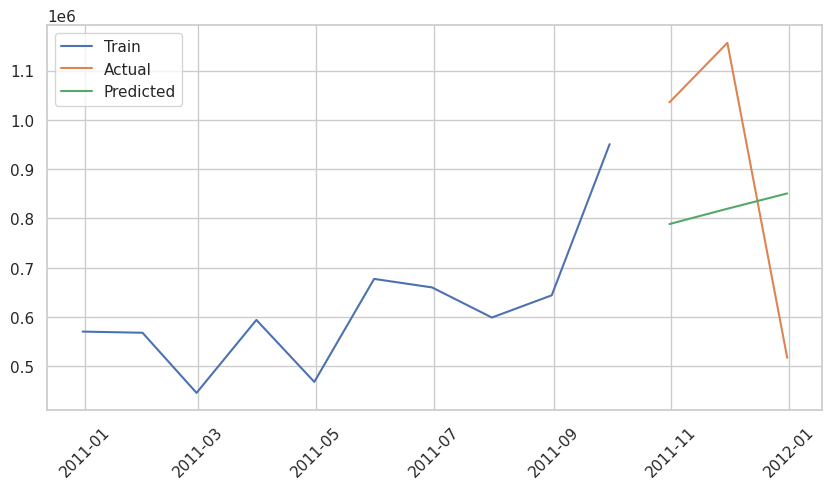

In [28]:
import matplotlib.pyplot as plt
plt.figure(figsize=(10,5))
plt.plot(train['date'], train['total_price'], label='Train')
plt.plot(test['date'], test['total_price'], label='Actual')
plt.plot(test['date'], result['predicted'], label='Predicted')
plt.legend()
plt.xticks(rotation=45)
plt.show()

In [29]:
df.to_csv("clean_data.csv", index=False)

**7. Findings and Insights**

[Power Bi Dashboard]()

***7.1 Summary of the Dashboard***

A Power BI Business Intelligence tool enabled the building of an interactive dashboard from the Online Retail dataset that has been modified to support the monitoring of activity performance based on historical data related to sales activities at different times (monthly) and in different geographic regions and at the level of products that comprise each sale, providing visual representations of that performance.


* KPI Cards


* Line Chart (Trend of Total Monthly Sales)


* Filled Map showing Revenue by Country


* A Pie Chart showing Quantity Sold by Each Month


* A Table showing Products sold


* Year and Month Slicers


***7.2 Key Performance Indicator (KPI) Cards***

The top of the dashboard displays a number of Key Performance Indicators (KPIs) for rapid viewing:


* Total Revenue


* Total Quantity Sold


* Total Order Count


* Total Customer Count


Together, these KPIs allow business owners and other interested parties to quickly determine the extent of business activity.


***7.3 Trend of Monthly Sales***


The total revenue generated each month is shown in a line chart to illustrate the trend of total revenue over a specific period of time (i.e., 12 months).


Insights:


In examining the monthly trend of total revenue generated, it is clear that sales continue to increase over the last two months of the year. October and November have the highest revenues, which indicates that seasonal demand is driving the highest revenues at those times, while the early months of the year tend to produce the lowest revenue volumes.


This insight can be used by businesses to assist with inventory, stocking and marketing strategies to ensure adequate support for peak season sales.

***7.4 Monthly Quantity Sold:***

The Monthly Quantity Sold was visualized using a Pie Chart based on the Total (or SUM) Quantity Sold not the discrete count.

Insights: The number of products sold during the last few months of the year increases substantially. Some months account for a much larger percentage of Total Quantity Sold. The Quantity trends closely follow the revenue trends. This chart can help visually understand the quantity and demand on Hand for Stocking purposes.

***7.5 Country Revenue (Filled Map)***

A Filled Map was used to display Total Revenue by Country.

Insights: The United Kingdom generates the highest percentage of total revenue. Other European Countries generate a significant amount of revenue but less than the UK. The darker areas of the map indicate higher contributions to Total Revenue. The map can be filtered by Year and Month and therefore provides a means for users to see how their product and revenue are shifting geographically over time.

***7.6 Product Performance***

A Table was used to display: Product description, Quantity sold, and Total Revenue.

Insights: A small number of the products sold have a very high percentage of revenue contributions. Products such as Paper Craft and Gift-Related Products are showing up as being very high volume and therefore should be given priority on inventory and promotion.

7.7 Slicer Functionality

The following slicers are included in the dashboard:

* Year

* Month

Impact:

All visualizations are updated automatically based on the slicer selected.

Users will be able to compare sales performance easily among different years and months.

This provides improved flexibility with exploratory analysis and decision-making.

***7.8 Summary of Insights***

* Sales are very seasonal with the highest peaks being attained in Q4.

* The UK has become the primary country for revenue generation.

* The quantity sold greatly increases during the months of highest revenue.

* The bulk of revenue is gained from a limited number of products.

* Interactive slicers add depth and usability to the analysis.

**Analysis of Retail Data: Summary**


This project used a dataset of an online retail business to analyse and generate insights about sales, consumers and their purchasing patterns, as well as the geography of the revenue generated by the business. The first step in this process was a complete cleansing of the data to ensure the removal of any cancelled transactions, and to convert the data into useful features (total revenue and the date of purchase).


Also through the exploratory analysis of the data, it was possible to identify a distinct seasonal sales pattern, with most sales occurring at the end of the year; to clarify this further, a large proportion of the revenue for the business was generated by a small selection of products and countries. Additional exploratory analysis of the data demonstrated how sales fluctuate over the months, and which products and markets are generating the highest sales.


The final phase of the project was to create a Power BI dashboard, which will allow users to visually interact with the data, and to see which years and months are contributing most to the growth of the business. The entire project illustrates the ability of analytics to extract useful insights from transaction data, enabling better decisions to be made on the overall direction of the business.